In [20]:
import json
import geojson
from pathlib import Path

In [21]:
import os
from PIL import Image
import numpy as np

openslide_path = r'C:\Users\Donald\Documents\openslide-win64-20230414\bin'

os.environ['PATH'] = openslide_path + ";" + os.environ['PATH']
# from openslide import OpenSlide


if hasattr(os, 'add_dll_directory'):
    # Python >= 3.8 on Windows
    with os.add_dll_directory(openslide_path):
        import openslide
else:
    import openslide
from openslide import OpenSlide

In [22]:
pth = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\1024tiles'

pth_mat = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\1024tiles\10x\matfiles'

crop_mats = [_ for _ in os.listdir(pth_mat) if _.endswith('mat')]

In [23]:
crop_mats

['crop_monkey_fetus_40_0105_ecm.mat',
 'crop_monkey_fetus_40_0271_eye.mat',
 'crop_monkey_fetus_40_0400_spinalcord.mat',
 'crop_monkey_fetus_40_0420_brain.mat',
 'crop_monkey_fetus_40_0432_bone.mat',
 'crop_monkey_fetus_40_0450_heart.mat',
 'crop_monkey_fetus_40_0730_kidney.mat']

In [24]:
res20x=0.4416
res10x=1

ratio = res10x/res20x
print(ratio)

2.2644927536231885


In [25]:
from scipy.io import loadmat

WSIs = [_ for _ in os.listdir(pth) if _.endswith('ndpi')]

res20x=0.4416
res10x=1

ratio = res10x/res20x

outpth = os.path.join(pth,'tiles')
if not os.path.exists(outpth):
    os.mkdir(outpth)

for i, file in enumerate(crop_mats):
    mat_file_name = os.path.join(pth_mat, file)

    f_out_name = f'{os.path.join(os.path.join(outpth,WSIs[i][:-5]))}.png'

    if file == 'crop_monkey_fetus_40_0420_brain.mat':
        print(mat_file_name)

        data = loadmat(mat_file_name)

        WSI_path = os.path.join(pth, WSIs[i])
        WSI_slide = openslide.OpenSlide(WSI_path)
        wsi_width, wsi_height = WSI_slide.level_dimensions[0]
        print(wsi_width)
        print(wsi_height)

        crop_width = int(data['crop_width']*ratio)
        crop_height = int(data['crop_height']*ratio)
        crop_x = int(data['crop_x']*ratio)
        crop_y = int(data['crop_y']*ratio)

        lower_x = crop_x
        upper_y = crop_y
        upper_x = crop_x + crop_width
        lower_y = crop_y - crop_height

        print(f"X range = {lower_x}:{upper_x}")
        print(f"Y range = {lower_y}:{upper_y}")



\\10.99.68.178\andreex\data\monkey fetus\gestational 40\1024tiles\10x\matfiles\crop_monkey_fetus_40_0420_brain.mat
36480
30976
X range = 8857:10016
Y range = 16070:17229


In [39]:
type_info = Path(r"\\10.99.68.178\andreex\data\monkey fetus\gestational 40\1024tiles\hovernet_output\monkey_fetus_40_0420.json")
info = json.load(open(type_info,'r'))

In [27]:
print(len(info['nuc']))

188161


In [28]:
info

{'mag': 20,
 'nuc': {'2': {'bbox': [[5635, 5991], [5649, 6013]],
   'centroid': [6001.474226804124, 5641.546391752578],
   'contour': [[6009, 5635],
    [6008, 5636],
    [6007, 5636],
    [6006, 5637],
    [6005, 5637],
    [6004, 5638],
    [6003, 5638],
    [6002, 5639],
    [6001, 5639],
    [5998, 5642],
    [5997, 5642],
    [5993, 5646],
    [5992, 5646],
    [5991, 5647],
    [5991, 5648],
    [5995, 5648],
    [5997, 5646],
    [5998, 5646],
    [5999, 5645],
    [6000, 5645],
    [6002, 5643],
    [6003, 5643],
    [6005, 5641],
    [6006, 5641],
    [6007, 5640],
    [6008, 5640],
    [6008, 5639],
    [6009, 5638],
    [6010, 5638],
    [6011, 5637],
    [6011, 5636],
    [6012, 5635]],
   'type_prob': None,
   'type': None},
  '3': {'bbox': [[5685, 5983], [5695, 5997]],
   'centroid': [5989.452380952381, 5689.416666666667],
   'contour': [[5991, 5685],
    [5990, 5686],
    [5989, 5686],
    [5987, 5688],
    [5986, 5688],
    [5984, 5690],
    [5984, 5691],
    [5983, 569

In [29]:
GEOdata=[]

In [30]:
print(f"X range = {lower_x}:{upper_x}")
print(f"Y range = {lower_y}:{upper_y}")

X range = 8857:10016
Y range = 16070:17229


In [31]:
type_info = Path(r"\\10.99.68.178\andreex\data\monkey fetus\gestational 40\1024tiles\monkey_fetus_40_0105_ecm.geojson")
info = json.load(open(type_info,'r'))
test_file = Path(r"\\10.99.68.178\andreex\data\monkey fetus\gestational 40\1024tiles\hovernet_output\monkey_fetus_40_0420.json")
DATA = json.load(open(test_file,'r'))
GEOdata=[]
# cells = [key for key in DATA['nuc'].items()]

points = []
count = 0
for key, cell in DATA['nuc'].items():
    # print(cell)
    centroid = cell['centroid']
    points.append(centroid)
    # print(centroid)
    if (lower_x <= centroid[0] <= upper_x) and (lower_y <= centroid[1] <= upper_y):
        # print(centroid)
        dict_data={}
        cc=cell['contour']
        skip = False
        for i, coords in enumerate(cc):
            cc[i][0] = coords[0] - lower_x
            cc[i][1] = coords[1] - lower_y
            if not (0 < cc[i][0] <= crop_width) or not (0 < cc[i][1] <= crop_width):
                skip = True
                break
        if skip:
            continue
        else:
            cc.append(cc[0])
            dict_data["type"]="Feature"
            dict_data["id"]="PathCellObject"
            dict_data["geometry"]={"type":"Polygon","coordinates":[cc]}
            dict_data["properties"]={'objectType': 'annotation',
        'classification': {'name': 'Nuclei', 'color': [97, 214, 59]}}
            GEOdata.append(dict_data)
            count += 1

print(count)

448


In [32]:
GEOdata

[{'type': 'Feature',
  'id': 'PathCellObject',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[1034, 508],
     [1033, 509],
     [1032, 509],
     [1031, 510],
     [1030, 510],
     [1030, 511],
     [1029, 512],
     [1029, 516],
     [1030, 516],
     [1031, 517],
     [1033, 517],
     [1034, 518],
     [1036, 518],
     [1037, 517],
     [1038, 517],
     [1040, 515],
     [1040, 514],
     [1041, 513],
     [1041, 512],
     [1040, 511],
     [1040, 510],
     [1038, 508],
     [1034, 508]]]},
  'properties': {'objectType': 'annotation',
   'classification': {'name': 'Nuclei', 'color': [97, 214, 59]}}},
 {'type': 'Feature',
  'id': 'PathCellObject',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[1042, 519],
     [1040, 521],
     [1039, 521],
     [1039, 523],
     [1038, 524],
     [1038, 527],
     [1039, 528],
     [1041, 528],
     [1042, 527],
     [1045, 527],
     [1046, 526],
     [1046, 525],
     [1050, 521],
     [1049, 520],
     [1047, 520],
     [104

188161
188161


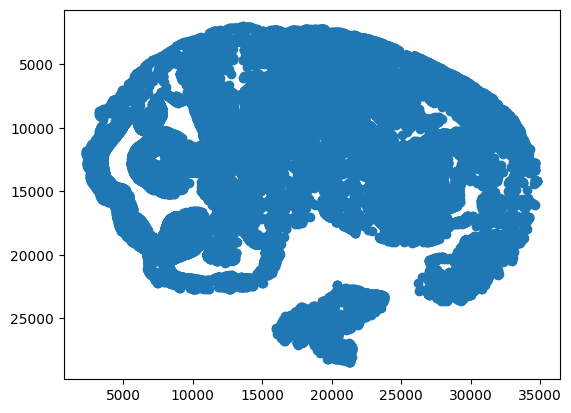

In [33]:
points = np.array(points)

import matplotlib.pyplot as plt

x = points[:, 0]
y = points[:, 1]

print(len(x))
print(len(y))

plt.scatter(x, y)
plt.gca().invert_yaxis()  # Invert the Y-axis
plt.show()

188161
188161


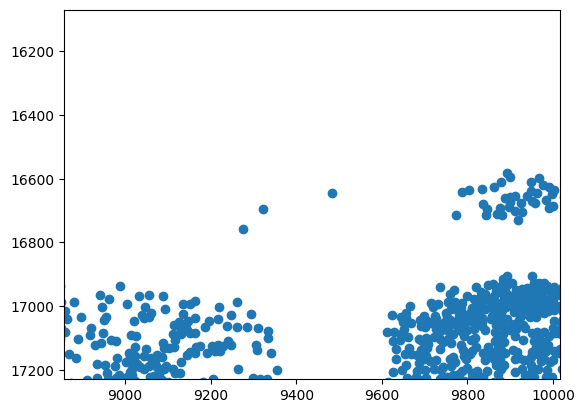

In [34]:
import matplotlib.pyplot as plt

print(len(x))
print(len(y))

plt.scatter(x, y)
plt.xlim(lower_x, upper_x)
plt.ylim(lower_y, upper_y)
plt.gca().invert_yaxis()  # Invert the Y-axis
plt.show()

In [35]:
print(f"X range = {lower_x}:{upper_x}")
print(f"Y range = {lower_y}:{upper_y}")

X range = 8857:10016
Y range = 16070:17229


In [36]:
for x in GEOdata:
    print(x)


{'type': 'Feature', 'id': 'PathCellObject', 'geometry': {'type': 'Polygon', 'coordinates': [[[1034, 508], [1033, 509], [1032, 509], [1031, 510], [1030, 510], [1030, 511], [1029, 512], [1029, 516], [1030, 516], [1031, 517], [1033, 517], [1034, 518], [1036, 518], [1037, 517], [1038, 517], [1040, 515], [1040, 514], [1041, 513], [1041, 512], [1040, 511], [1040, 510], [1038, 508], [1034, 508]]]}, 'properties': {'objectType': 'annotation', 'classification': {'name': 'Nuclei', 'color': [97, 214, 59]}}}
{'type': 'Feature', 'id': 'PathCellObject', 'geometry': {'type': 'Polygon', 'coordinates': [[[1042, 519], [1040, 521], [1039, 521], [1039, 523], [1038, 524], [1038, 527], [1039, 528], [1041, 528], [1042, 527], [1045, 527], [1046, 526], [1046, 525], [1050, 521], [1049, 520], [1047, 520], [1046, 519], [1045, 520], [1044, 519], [1042, 519]]]}, 'properties': {'objectType': 'annotation', 'classification': {'name': 'Nuclei', 'color': [97, 214, 59]}}}
{'type': 'Feature', 'id': 'PathCellObject', 'geome

In [37]:
print(len(GEOdata))

448


In [42]:
type(GEOdata[0]['geometry']['coordinates'][0][0][0])

int

In [44]:
print(GEOdata[:5])

[{'type': 'Feature', 'id': 'PathCellObject', 'geometry': {'type': 'Polygon', 'coordinates': [[[1034, 508], [1033, 509], [1032, 509], [1031, 510], [1030, 510], [1030, 511], [1029, 512], [1029, 516], [1030, 516], [1031, 517], [1033, 517], [1034, 518], [1036, 518], [1037, 517], [1038, 517], [1040, 515], [1040, 514], [1041, 513], [1041, 512], [1040, 511], [1040, 510], [1038, 508], [1034, 508]]]}, 'properties': {'objectType': 'annotation', 'classification': {'name': 'Nuclei', 'color': [97, 214, 59]}}}, {'type': 'Feature', 'id': 'PathCellObject', 'geometry': {'type': 'Polygon', 'coordinates': [[[1042, 519], [1040, 521], [1039, 521], [1039, 523], [1038, 524], [1038, 527], [1039, 528], [1041, 528], [1042, 527], [1045, 527], [1046, 526], [1046, 525], [1050, 521], [1049, 520], [1047, 520], [1046, 519], [1045, 520], [1044, 519], [1042, 519]]]}, 'properties': {'objectType': 'annotation', 'classification': {'name': 'Nuclei', 'color': [97, 214, 59]}}}, {'type': 'Feature', 'id': 'PathCellObject', 'ge

In [38]:
out_pn = Path(r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\1024tiles\test_hover_qupath')
new_fn = test_file.parts[-1].split('.')[0] + '.geojson'

print(new_fn)
with open(out_pn.joinpath(new_fn),'w') as outfile:
    geojson.dump(GEOdata,outfile)
print('Finished',new_fn)

monkey_fetus_40_0420.geojson
Finished monkey_fetus_40_0420.geojson
